In [1]:
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from mpl_toolkits import mplot3d
import cv2
import time
from scipy.io import savemat

In [2]:
print(sns.__version__)

0.11.1


## Plot pdf of the height field and slopes

In [3]:
M,N,K = 200, 100, 73

(200, 100, 73) 200 100 73


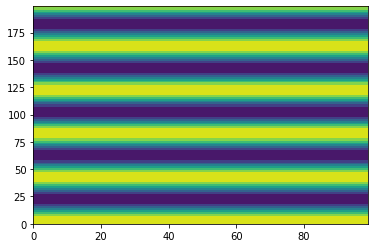

In [4]:
x = np.arange(M)
y = np.arange(N)
t = np.arange(K)
X, Y, T = np.meshgrid(y,x, t)
Z = np.sin(10*np.pi/M*Y + 2*T)
Zy = np.zeros(Z.shape)
Zx = np.cos(10*np.pi/M*Y + 2*T) * 10*np.pi/M
plt.contourf(X[:,:,0],Y[:,:,0],Z[:,:,10])
print(Z.shape, M, N, K)

In [5]:
s_hat_x = np.fft.fftn(Zx, axes = ([0,1,2]))
s_hat_x = np.fft.fftshift(s_hat_x)
s_hat_x_mag = (np.log(np.abs(s_hat_x)))**2

s_hat_y = np.fft.fftn(Zy, axes = ([0,1,2]))
s_hat_y = np.fft.fftshift(s_hat_y) # DC content at the center
s_hat_y_mag = (np.log(np.abs(s_hat_y)))**2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [6]:
print(s_hat_x_mag.shape)

(200, 100, 73)


In [7]:
FreqCompRows = np.fft.fftfreq(s_hat_x.shape[0],d=1)
FreqCompCols = np.fft.fftfreq(s_hat_x.shape[1],d=1)
FreqCompVert = np.fft.fftfreq(s_hat_x.shape[2],d=1)
FreqCompRows = np.fft.fftshift(FreqCompRows)
FreqCompCols = np.fft.fftshift(FreqCompCols)
FreqCompVert = np.fft.fftshift(FreqCompVert)

R,C,V = np.meshgrid(FreqCompRows, FreqCompCols, FreqCompVert)

In [8]:
print(s_hat_x_mag.shape, FreqCompRows.shape, FreqCompCols.shape, FreqCompVert.shape)

(200, 100, 73) (200,) (100,) (73,)


In [9]:
dic = {"R":R,"C":C,"V":V \
         ,"FreqCompRows":FreqCompRows, "FreqCompCols":FreqCompCols, "FreqCompVert":FreqCompVert\
        ,"s_hat_x_mag":s_hat_x_mag, "s_hat_y_mag":s_hat_y_mag\
        ,'BEDFORM':'sine'}
savemat('../FLIR_Camera/3DFFT_sine.mat',dic)